In [45]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from os.path import join
import ipywidgets as widgets

from IPython.display import display
import torch
import pickle
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [43]:
classes = ('ECL_Contact', 'ECL_No-Contact', 'Ellipsoid','RRL_AB', 'RRL_C')

In [31]:
with open('best50_10each_notInterpol.pkl', 'rb') as handle:
    VVV_toy = pickle.load(handle)

In [41]:
VVV_toy[49]['data'][2]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 

<IPython.core.display.Javascript object>


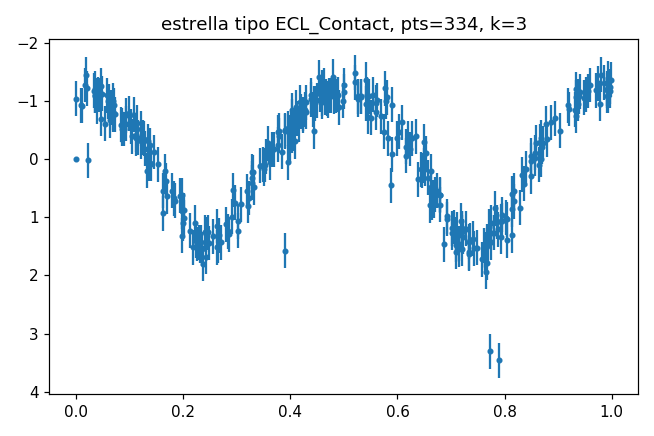

In [49]:
k = np.random.randint(len(VVV_toy))
fig, ax = plt.subplots(1, 1, figsize=(6, 4), tight_layout=True)
def plotea(datos, k, ax,classes):
    #assert len(ax)==1, "Needs one subaxis"
    n = int(sum(datos[k]['data'][2] == 1))
    l = datos[k]['label'][0].item()
    ax.cla()
    ax.errorbar(datos[k]['data'][0], datos[k]['data'][1], datos[k]['data'][2]*0.3, fmt='.')
    ax.invert_yaxis()
    ax.set_title("estrella tipo %s, pts=%d, k=%d" %(classes[l],n,k))

plotea(VVV_toy,k, ax,classes)
#plotea(VVV_pha,k, ax,classes)
b1 = widgets.Button(description="Otra")
b2 = widgets.Button(description="Save this")
display(widgets.HBox([b1,b2]))

def on_button_clicked(b):
    global k,best_0,best_1,best_2,best_3,best_4,best_of_best
    if b.description == "Save this":
        print("not implemented.")
        #best_of_best.append(best_4[k])
        #print("guardada, k=",k,count_classes(best_of_best))
    else:
        k = np.random.randint(len(VVV_toy))
        #print(k)
        plotea(VVV_toy,k, ax,classes)
        #plotea(VVV_pha,k, ax,classes)

    
b1.on_click(on_button_clicked)
b2.on_click(on_button_clicked)



<IPython.core.display.Javascript object>


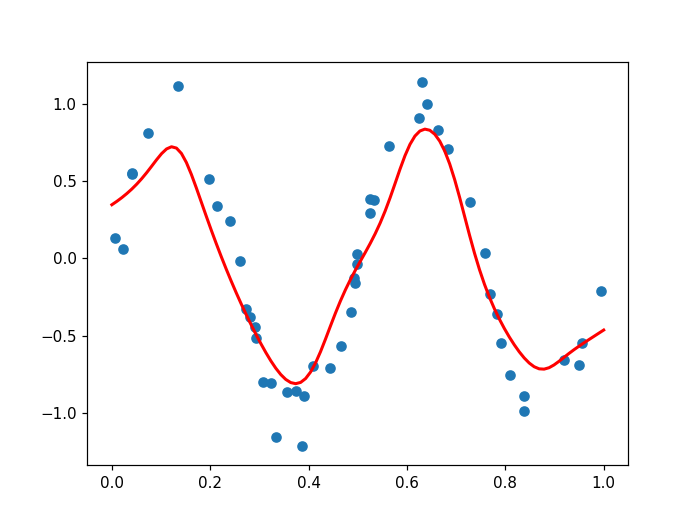

In [29]:

# phase ordenada
phi = np.sort(np.random.rand(50))

# magnitude 
mag = np.sin(2.0*np.pi*2*phi) + 0.1*np.random.randn(len(phi))

# errores cuadraticos de cada punto con respecto a la phase (?)
window = lambda phi_point : np.exp(-0.5*(phi_point-phi)**2/0.05**2)

# espaciado regular de 100 pts entre 0 y 1
phi_interp = np.linspace(0, 1, num=100)

# cálculo de la interpolacion (prediccion) de la magnitud "basado en la cercania entre los puntos"
mag_interp = np.array([np.sum(window(phi_val)*mag)/np.sum(window(phi_val)) for phi_val in phi_interp])

plt.figure()
plt.scatter(phi, mag)
plt.plot(phi_interp, mag_interp, lw=2, c='r')



In [4]:
column_names_lc = ["mjd", "mag", "err"]
column_names_fill = ["mjd", "mag", "err", "phase", "real"]
df_test = pd.DataFrame(np.random.random((10,3)),columns=column_names_lc)
df_zeros = pd.DataFrame(np.zeros((1, 5)),columns=column_names_fill)
display(df_test, df_zeros)

,mjd,mag,err
0,0.042308,0.000886,0.725988
1,0.613378,0.937218,0.033192
2,0.721319,0.464582,0.252493
3,0.389370,0.656388,0.908573
4,0.966119,0.436520,0.576371
5,0.752570,0.696677,0.772603
6,0.767082,0.988599,0.410948
7,0.224324,0.927140,0.716390
8,0.102728,0.848889,0.667653
9,0.057599,0.415291,0.125151


,mjd,mag,err,phase,real
0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_test["phase"] = df_test["mag"]+df_test["mjd"]

In [6]:
while len(df_test) < 15:
    df_test = df_test.append(df_zeros, ignore_index=True, sort=False)
    print("ok")

ok
ok
ok
ok
ok


In [7]:
display(df_test)

,mjd,mag,err,phase,real
0,0.042308,0.000886,0.725988,0.043194,NaN
1,0.613378,0.937218,0.033192,1.550596,NaN
2,0.721319,0.464582,0.252493,1.185901,NaN
3,0.389370,0.656388,0.908573,1.045758,NaN
4,0.966119,0.436520,0.576371,1.402639,NaN
5,0.752570,0.696677,0.772603,1.449247,NaN
6,0.767082,0.988599,0.410948,1.755681,NaN
7,0.224324,0.927140,0.716390,1.151464,NaN
8,0.102728,0.848889,0.667653,0.951617,NaN
9,0.057599,0.415291,0.125151,0.472890,NaN


In [10]:
df_test = df_test.fillna(1)
display(df_test)

,mjd,mag,err,phase,real
0,0.042308,0.000886,0.725988,0.043194,1.0
1,0.613378,0.937218,0.033192,1.550596,1.0
2,0.721319,0.464582,0.252493,1.185901,1.0
3,0.389370,0.656388,0.908573,1.045758,1.0
4,0.966119,0.436520,0.576371,1.402639,1.0
5,0.752570,0.696677,0.772603,1.449247,1.0
6,0.767082,0.988599,0.410948,1.755681,1.0
7,0.224324,0.927140,0.716390,1.151464,1.0
8,0.102728,0.848889,0.667653,0.951617,1.0
9,0.057599,0.415291,0.125151,0.472890,1.0


In [ ]:
 # for cada input
        #    usar mascara para filtrar datos reales
        #    cada input sera de 5x335 -> 5xn (n datos reales) -> unsqueeze(0) -> 1x5xn
        #    model.forward(input)
        #    loss=criterion
        #    sumar loss
        #    backward
        # optimizer.step

In [44]:
df_tensor = torch.from_numpy(df_test.values.astype('float32'))
n = sum(df_tensor[:,4] == 1)
data = df_tensor[:n]
data

tensor([[4.2308e-02, 8.8601e-04, 7.2599e-01, 4.3194e-02, 1.0000e+00],
        [6.1338e-01, 9.3722e-01, 3.3192e-02, 1.5506e+00, 1.0000e+00],
        [7.2132e-01, 4.6458e-01, 2.5249e-01, 1.1859e+00, 1.0000e+00],
        [3.8937e-01, 6.5639e-01, 9.0857e-01, 1.0458e+00, 1.0000e+00],
        [9.6612e-01, 4.3652e-01, 5.7637e-01, 1.4026e+00, 1.0000e+00],
        [7.5257e-01, 6.9668e-01, 7.7260e-01, 1.4492e+00, 1.0000e+00],
        [7.6708e-01, 9.8860e-01, 4.1095e-01, 1.7557e+00, 1.0000e+00],
        [2.2432e-01, 9.2714e-01, 7.1639e-01, 1.1515e+00, 1.0000e+00],
        [1.0273e-01, 8.4889e-01, 6.6765e-01, 9.5162e-01, 1.0000e+00],
        [5.7599e-02, 4.1529e-01, 1.2515e-01, 4.7289e-01, 1.0000e+00]])

In [20]:
n=sum(df_test['real']==1)

In [39]:
df_test_real = df_test[:n]

In [30]:
df_test_real.transpose().shape

(5, 10)

In [41]:
df_tensor = torch.from_numpy(df_test_real.values.astype('float32'))
df_tensor = df_tensor.transpose(0,1).unsqueeze(0)
#df_tensor = df_tensor.unsqueeze(0)
df_tensor.shape

torch.Size([1, 5, 10])

In [16]:

for i in range(len(df_test)):
    if df_test['real'][i] == 1:
        print("ok")
    else:
        n=i
        print(n)
        break

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
10
